# COVID classificaion from x-ray images using resnet50 by fast.ai framework


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 147MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.165350,1.842714,0.525000,02:11


epoch,train_loss,valid_loss,accuracy,time
0,0.403215,1.150460,0.550000,02:17
1,0.418833,0.725475,0.700000,02:18
2,0.390864,0.555096,0.725000,02:19
3,0.357376,0.535456,0.600000,02:17
4,0.333211,0.568184,0.675000,02:15
5,0.295433,0.680475,0.650000,02:12
6,0.259652,0.742576,0.675000,02:23
7,0.244174,0.754082,0.675000,02:13
8,0.223213,0.769008,0.700000,02:12
9,0.210636,0.833481,0.675000,02:15


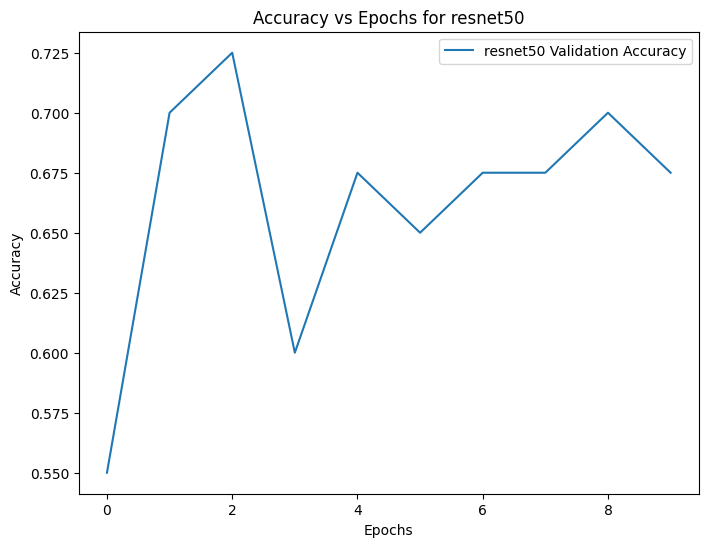

Overall accuracy for resnet50: 0.6750


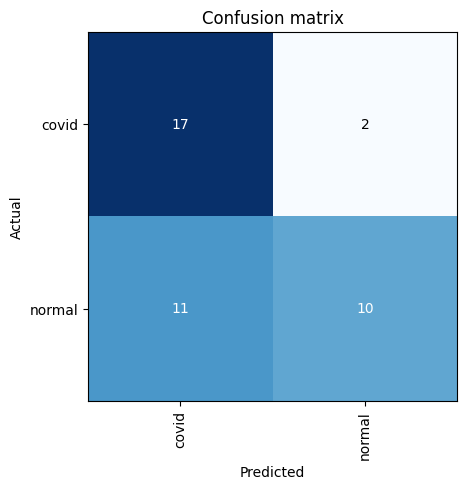

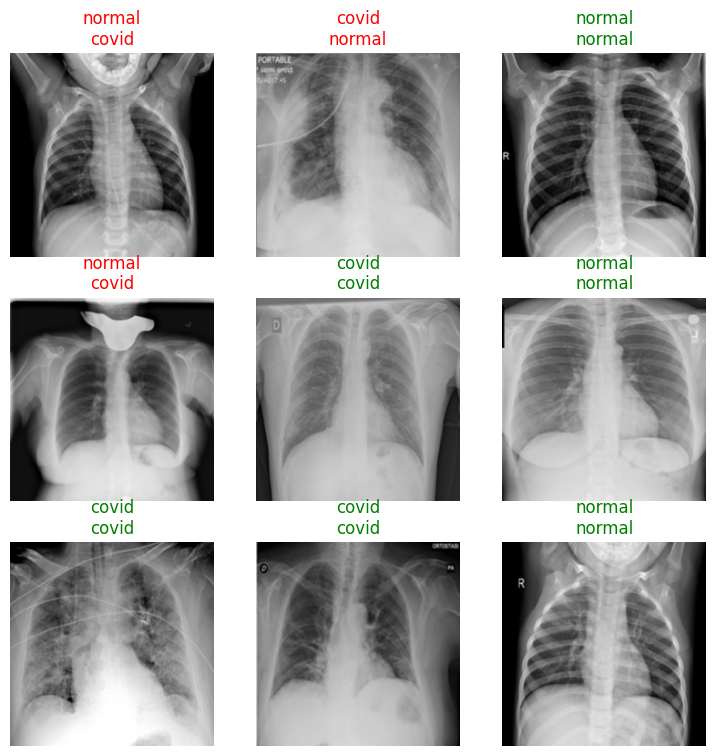

In [ ]:
# # Step 1: Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# # Step 2: Install FastAI
# !pip install fastai

# Step 3: Load Data
from fastai.vision.all import *

# Define the path to the dataset
path = Path('/content/drive/MyDrive/ML DL')

# Define the DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

# Create the DataLoaders
dls = dblock.dataloaders(path)

# Step 4: Train and Evaluate Multiple Models
import matplotlib.pyplot as plt

# Function to train a model, plot accuracy graph, and display confusion matrix
def train_and_plot(model_name, dls):
    # Create learner
    learn = cnn_learner(dls, model_name, metrics=accuracy)

    # Train the model
    learn.fine_tune(10)

    # Extract accuracy metrics
    valid_accuracies = [v[2] for v in learn.recorder.values]

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(valid_accuracies, label=f'{model_name.__name__} Validation Accuracy')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Accuracy vs Epochs for {model_name.__name__}')
    plt.legend()
    plt.show()

    # Print confusion matrix and overall accuracy
    interp = ClassificationInterpretation.from_learner(learn)
    interp.plot_confusion_matrix()
    overall_accuracy = learn.validate()[1]
    print(f'Overall accuracy for {model_name.__name__}: {overall_accuracy:.4f}')

    # Return the learner and its accuracies
    return learn, valid_accuracies, overall_accuracy

# List of models to train
models = [resnet50]

# Train and plot for each model
learners = []
valid_accuracies = []
overall_accuracies = []

for model in models:
    learner, valid_accuracy, overall_accuracy = train_and_plot(model, dls)
    learners.append(learner)
    valid_accuracies.append((model.__name__, valid_accuracy))
    overall_accuracies.append((model.__name__, overall_accuracy))

# Step 5: Evaluate and Save the Models
for learner, model in zip(learners, models):
    # Evaluate the model
    learner.show_results()

    # Save the model
    learner.export(f'/content/drive/MyDrive/covid_classifier_{model.__name__}.pkl')

# # Step 6: Plot Combined Accuracy Graph
# plt.figure(figsize=(12, 8))
# for model_name, valid_accuracy in valid_accuracies:
#     plt.plot(valid_accuracy, label=f'{model_name} Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.title('Validation Accuracy vs Epochs for Different Models')
# plt.legend()
# plt.show()

# # Print overall accuracies
# for model_name, overall_accuracy in overall_accuracies:
#     print(f'Overall accuracy for {model_name}: {overall_accuracy:.4f}')
